# Week 7 Lab: Text Analytics

In [1]:
import pandas as pd

c:\Users\Chris Lowson\new.conda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
news = pd.read_csv('assign_wk7/bbc.csv')
news

,id,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business
...,...,...,...
2220,2220,Warning over Windows Word files\n \n Writing a...,tech
2221,2221,Fast lifts rise into record books\n \n Two hig...,tech
2222,2222,Nintendo adds media playing to DS\n \n Nintend...,tech
2223,2223,Fast moving phone viruses appear\n \n Security...,tech


    Remove ID column and add some other informational columns

In [3]:
news.drop('id',axis=1,inplace=True)
news

,news,type
0,UK economy facing 'major risks'\n \n The UK ma...,business
1,Aids and climate top Davos agenda\n \n Climate...,business
2,Asian quake hits European shares\n \n Shares i...,business
3,India power shares jump on debut\n \n Shares i...,business
4,Lacroix label bought by US firm\n \n Luxury go...,business
...,...,...
2220,Warning over Windows Word files\n \n Writing a...,tech
2221,Fast lifts rise into record books\n \n Two hig...,tech
2222,Nintendo adds media playing to DS\n \n Nintend...,tech
2223,Fast moving phone viruses appear\n \n Security...,tech


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Chris
[nltk_data]     Lowson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

news['stopwords'] = news.news.apply(lambda x: len([x for x in x.split() if x in stop]))

In [6]:
news['char_cnt'] = news.news.str.len()

In [7]:
news['word_cnt'] = news.news.apply(lambda x: len(str(x).split(" ")))
news

,news,type,stopwords,char_cnt,word_cnt
0,UK economy facing 'major risks'\n \n The UK ma...,business,112,1996,329
1,Aids and climate top Davos agenda\n \n Climate...,business,161,2727,454
2,Asian quake hits European shares\n \n Shares i...,business,171,3444,553
3,India power shares jump on debut\n \n Shares i...,business,55,1038,175
4,Lacroix label bought by US firm\n \n Luxury go...,business,47,894,152
...,...,...,...,...,...
2220,Warning over Windows Word files\n \n Writing a...,tech,172,2945,464
2221,Fast lifts rise into record books\n \n Two hig...,tech,131,2286,399
2222,Nintendo adds media playing to DS\n \n Nintend...,tech,121,1649,297
2223,Fast moving phone viruses appear\n \n Security...,tech,132,1939,335


    added a few informational columns and took the entire data set to lowercase values.

In [8]:
news['clean_text'] = news.news.apply(lambda x: " ".join(x.lower() for x in x.split()))
news

,news,type,stopwords,char_cnt,word_cnt,clean_text
0,UK economy facing 'major risks'\n \n The UK ma...,business,112,1996,329,uk economy facing 'major risks' the uk manufac...
1,Aids and climate top Davos agenda\n \n Climate...,business,161,2727,454,aids and climate top davos agenda climate chan...
2,Asian quake hits European shares\n \n Shares i...,business,171,3444,553,asian quake hits european shares shares in eur...
3,India power shares jump on debut\n \n Shares i...,business,55,1038,175,india power shares jump on debut shares in ind...
4,Lacroix label bought by US firm\n \n Luxury go...,business,47,894,152,lacroix label bought by us firm luxury goods g...
...,...,...,...,...,...,...
2220,Warning over Windows Word files\n \n Writing a...,tech,172,2945,464,warning over windows word files writing a micr...
2221,Fast lifts rise into record books\n \n Two hig...,tech,131,2286,399,fast lifts rise into record books two high-spe...
2222,Nintendo adds media playing to DS\n \n Nintend...,tech,121,1649,297,nintendo adds media playing to ds nintendo is ...
2223,Fast moving phone viruses appear\n \n Security...,tech,132,1939,335,fast moving phone viruses appear security firm...


    Making a 'clean-text' column to copy the original and edit. This will allow me to monitor some differencees as I clean the data.

In [9]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   news        2225 non-null   object
 1   type        2225 non-null   object
 2   stopwords   2225 non-null   int64 
 3   char_cnt    2225 non-null   int64 
 4   word_cnt    2225 non-null   int64 
 5   clean_text  2225 non-null   object
dtypes: int64(3), object(3)
memory usage: 104.4+ KB


In [10]:
news.head(10)

,news,type,stopwords,char_cnt,word_cnt,clean_text
0,UK economy facing 'major risks'\n \n The UK ma...,business,112,1996,329,uk economy facing 'major risks' the uk manufac...
1,Aids and climate top Davos agenda\n \n Climate...,business,161,2727,454,aids and climate top davos agenda climate chan...
2,Asian quake hits European shares\n \n Shares i...,business,171,3444,553,asian quake hits european shares shares in eur...
3,India power shares jump on debut\n \n Shares i...,business,55,1038,175,india power shares jump on debut shares in ind...
4,Lacroix label bought by US firm\n \n Luxury go...,business,47,894,152,lacroix label bought by us firm luxury goods g...
5,Insurance bosses plead guilty\n \n Another thr...,business,39,920,146,insurance bosses plead guilty another three us...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,91,1539,257,turkey-iran mobile deal 'at risk' turkey's inv...
7,Parmalat to return to stockmarket\n \n Parmala...,business,100,1675,269,"parmalat to return to stockmarket parmalat, th..."
8,WorldCom director admits lying\n \n The former...,business,129,2085,356,worldcom director admits lying the former chie...
9,Ebbers denies WorldCom fraud\n \n Former World...,business,125,2067,346,ebbers denies worldcom fraud former worldcom c...


In [11]:
news.news[5]

'Insurance bosses plead guilty\n \n Another three US insurance executives have pleaded guilty to fraud charges stemming from an ongoing investigation into industry malpractice.\n \n Two executives from American International Group (AIG) and one from Marsh & McLennan were the latest. The investigation by New York attorney general Eliot Spitzer has now obtained nine guilty pleas. The highest ranking executive pleading guilty on Tuesday was former Marsh senior vice president Joshua Bewlay.\n \n He admitted one felony count of scheming to defraud and faces up to four years in prison. A Marsh spokeswoman said Mr Bewlay was no longer with the company. Mr Spitzer\'s investigation of the US insurance industry looked at whether companies rigged bids and fixed prices. Last month Marsh agreed to pay $850m (£415m) to settle a lawsuit filed by Mr Spitzer, but under the settlement it "neither admits nor denies the allegations".\n'

In [12]:
news.clean_text[5]

'insurance bosses plead guilty another three us insurance executives have pleaded guilty to fraud charges stemming from an ongoing investigation into industry malpractice. two executives from american international group (aig) and one from marsh & mclennan were the latest. the investigation by new york attorney general eliot spitzer has now obtained nine guilty pleas. the highest ranking executive pleading guilty on tuesday was former marsh senior vice president joshua bewlay. he admitted one felony count of scheming to defraud and faces up to four years in prison. a marsh spokeswoman said mr bewlay was no longer with the company. mr spitzer\'s investigation of the us insurance industry looked at whether companies rigged bids and fixed prices. last month marsh agreed to pay $850m (£415m) to settle a lawsuit filed by mr spitzer, but under the settlement it "neither admits nor denies the allegations".'

    Through some outside inspection of my data I found a few '.com', '@', 'www.' and then an excess of grammar symbols as one would expect. 

In [13]:
news['clean_text'] = news.clean_text.str.replace('\S+@\S+','') 
news['clean_text'] = news.clean_text.str.replace('www.\S+','') 
news['clean_text'] = news.clean_text.str.replace('\S+.com','') 
news['clean_text'] = news.clean_text.str.replace('£\S','') 

In [14]:
news['clean_text'] = news.clean_text.str.replace('[^\,."/w\s]','') #regular expression

    That looks better! 

    This is a word analysis, removing digits.

In [15]:
news['clean_text'] = news.clean_text.str.replace('\d+','')

In [16]:
news.head(12)

,news,type,stopwords,char_cnt,word_cnt,clean_text
0,UK economy facing 'major risks'\n \n The UK ma...,business,112,1996,329,uk economy facing 'major risks' the uk manufac...
1,Aids and climate top Davos agenda\n \n Climate...,business,161,2727,454,aids and climate top davos agenda climate chan...
2,Asian quake hits European shares\n \n Shares i...,business,171,3444,553,asian quake hits european shares shares in eur...
3,India power shares jump on debut\n \n Shares i...,business,55,1038,175,india power shares jump on debut shares in ind...
4,Lacroix label bought by US firm\n \n Luxury go...,business,47,894,152,lacroix label bought by us firm luxury goods g...
5,Insurance bosses plead guilty\n \n Another thr...,business,39,920,146,insurance bosses plead guilty another three us...
6,Turkey-Iran mobile deal 'at risk'\n \n Turkey'...,business,91,1539,257,turkey-iran mobile deal 'at risk' turkey's inv...
7,Parmalat to return to stockmarket\n \n Parmala...,business,100,1675,269,"parmalat to return to stockmarket parmalat, th..."
8,WorldCom director admits lying\n \n The former...,business,129,2085,356,worldcom director admits lying the former chie...
9,Ebbers denies WorldCom fraud\n \n Former World...,business,125,2067,346,ebbers denies worldcom fraud former worldcom c...


In [17]:
news.clean_text[1508]

'aragones angered by racism fine spain coach luis aragones is furious after being fined by the spanish football federation for his comments about thierry henry. the 66-year-old criticised his 3000 euros (£2,060) punishment even though it was far below the maximum penalty. "i am not guilty, nor do i accept being judged for actions against the image of the sport," he said. "i\'m not a racist and i\'ve never lacked sporting decorum. i\'ve never done that and i have medals for sporting merit." aragones was handed the fine on tuesday after making racist remarks about henry to arsenal team-mate and spanish international jose reyes last october. the spanish football federation at first declined to take action against aragones, but was then requested to do so by spain\'s anti-violence commission. the fine was far less than the expected amount of about £22,000 or even the suspension of his coaching licence. arsenal boss arsene wenger, who was fined £15,000 in december for accusing manchester un

    from my visual check I know id 1508 had a website, digits, and punctuation.

    Removing stop words

In [18]:
news.news.apply(lambda x: " ".join([word for word in x.split() if word.isalpha()] ))

0       UK economy facing The UK manufacturing sector ...
1       Aids and climate top Davos agenda Climate chan...
2       Asian quake hits European shares Shares in lea...
3       India power shares jump on debut Shares in lar...
4       Lacroix label bought by US firm Luxury goods g...
                              ...                        
2220    Warning over Windows Word files Writing a Micr...
2221    Fast lifts rise into record books Two lifts at...
2222    Nintendo adds media playing to DS Nintendo is ...
2223    Fast moving phone viruses appear Security firm...
2224    Hacker threat to iTunes Users of music jukebox...
Name: news, Length: 2225, dtype: object

In [19]:
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
news['clean_text'] = news.clean_text.apply(lambda x: " ".join(w for w in x.split() if w not in stop))

In [21]:
tokens = ' '.join(news.clean_text).split()
tokens[:200]

['uk',
 'economy',
 'facing',
 "'major",
 "risks'",
 'uk',
 'manufacturing',
 'sector',
 'continue',
 'face',
 '"serious',
 'challenges"',
 'next',
 'two',
 'years,',
 'british',
 'chamber',
 'commerce',
 '(bcc)',
 'said.',
 "group's",
 'quarterly',
 'survey',
 'companies',
 'found',
 'exports',
 'picked',
 'last',
 'three',
 'months',
 '2004',
 'best',
 'levels',
 'eight',
 'years.',
 'rise',
 'came',
 'despite',
 'exchange',
 'rates',
 'cited',
 'major',
 'concern.',
 'however,',
 'bcc',
 'found',
 'whole',
 'uk',
 'economy',
 'still',
 'faced',
 '"major',
 'risks"',
 'warned',
 'growth',
 'set',
 'slow.',
 'recently',
 'forecast',
 'economic',
 'growth',
 'slow',
 '3%',
 '2004',
 'little',
 '2.5%',
 '2005',
 '2006.',
 "manufacturers'",
 'domestic',
 'sales',
 'growth',
 'fell',
 'back',
 'slightly',
 'quarter,',
 'survey',
 '5,196',
 'firms',
 'found.',
 'employment',
 'manufacturing',
 'also',
 'fell',
 'job',
 'expectations',
 'lowest',
 'level',
 'year.',
 '"despite',
 'positive'

In [22]:
print(len(tokens))

509067


    I want to convert words into root words. The next few cells should treat run, ran, & running as the same 'word' run.

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#establish the lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\Chris
[nltk_data]     Lowson\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
#a quick test
words = ['ran','running']
for w in words:
    print("Lemmatization for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))

Lemmatization for ran is ran
Lemmatization for running is running


    So this is important for me to know. Some things can be 'different' or 'alternate' meaning, in this case running. 

In [25]:
news['clean_text'] = news.clean_text.apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(w) for w in x.split()))
news

,news,type,stopwords,char_cnt,word_cnt,clean_text
0,UK economy facing 'major risks'\n \n The UK ma...,business,112,1996,329,uk economy facing 'major risks' uk manufacturi...
1,Aids and climate top Davos agenda\n \n Climate...,business,161,2727,454,aid climate top davos agenda climate change fi...
2,Asian quake hits European shares\n \n Shares i...,business,171,3444,553,asian quake hit european share share europe's ...
3,India power shares jump on debut\n \n Shares i...,business,55,1038,175,india power share jump debut share india's lar...
4,Lacroix label bought by US firm\n \n Luxury go...,business,47,894,152,lacroix label bought u firm luxury good group ...
...,...,...,...,...,...,...
2220,Warning over Windows Word files\n \n Writing a...,tech,172,2945,464,warning window word file writing microsoft wor...
2221,Fast lifts rise into record books\n \n Two hig...,tech,131,2286,399,fast lift rise record book two high-speed lift...
2222,Nintendo adds media playing to DS\n \n Nintend...,tech,121,1649,297,nintendo add medium playing d nintendo releasi...
2223,Fast moving phone viruses appear\n \n Security...,tech,132,1939,335,fast moving phone virus appear security firm w...


    I am curious how many words I have cut out.. 

In [26]:
news['clean_cnt'] = news.clean_text.apply(lambda x: len(str(x).split(" ")))
news

,news,type,stopwords,char_cnt,word_cnt,clean_text,clean_cnt
0,UK economy facing 'major risks'\n \n The UK ma...,business,112,1996,329,uk economy facing 'major risks' uk manufacturi...,203
1,Aids and climate top Davos agenda\n \n Climate...,business,161,2727,454,aid climate top davos agenda climate change fi...,276
2,Asian quake hits European shares\n \n Shares i...,business,171,3444,553,asian quake hit european share share europe's ...,360
3,India power shares jump on debut\n \n Shares i...,business,55,1038,175,india power share jump debut share india's lar...,113
4,Lacroix label bought by US firm\n \n Luxury go...,business,47,894,152,lacroix label bought u firm luxury good group ...,99
...,...,...,...,...,...,...,...
2220,Warning over Windows Word files\n \n Writing a...,tech,172,2945,464,warning window word file writing microsoft wor...,279
2221,Fast lifts rise into record books\n \n Two hig...,tech,131,2286,399,fast lift rise record book two high-speed lift...,242
2222,Nintendo adds media playing to DS\n \n Nintend...,tech,121,1649,297,nintendo add medium playing d nintendo releasi...,163
2223,Fast moving phone viruses appear\n \n Security...,tech,132,1939,335,fast moving phone virus appear security firm w...,192


    In some cases quite a bit so far! 

In [27]:
freq = pd.Series(' '.join(news.clean_text).split()).value_counts().to_dict()

# although dictionaries are useful data structures, they are had to 'slice-off' specific secions, so we use a list of this
list(freq.items())[:20]

[('said', 4908),
 ('-', 3195),
 ('mr', 3020),
 ('would', 2558),
 ('also', 2141),
 ('new', 1929),
 ('people', 1755),
 ('one', 1623),
 ('u', 1615),
 ('said.', 1499),
 ('could', 1499),
 ('year', 1405),
 ('last', 1369),
 ('first', 1254),
 ('two', 1135),
 ('game', 1081),
 ('say', 1073),
 ('make', 1049),
 ('time', 1036),
 ('"i', 985)]

    I see the letter 'u' present. I am not sure in what context it is being used so I may remove that, as well as any other random 1 letter 'words' that may be present

In [28]:
news['clean_text'] = news.clean_text.apply(lambda x: " ".join(x for x in x.split() if len(x) > 1))

freq = pd.Series(' '.join(news.clean_text).split()).value_counts().to_dict()
list(freq.items())[:40]

[('said', 4908),
 ('mr', 3020),
 ('would', 2558),
 ('also', 2141),
 ('new', 1929),
 ('people', 1755),
 ('one', 1623),
 ('could', 1499),
 ('said.', 1499),
 ('year', 1405),
 ('last', 1369),
 ('first', 1254),
 ('two', 1135),
 ('game', 1081),
 ('say', 1073),
 ('make', 1049),
 ('time', 1036),
 ('"i', 985),
 ('get', 952),
 ('government', 904),
 ('told', 898),
 ('best', 895),
 ('film', 883),
 ('"the', 882),
 ('company', 850),
 ('like', 848),
 ('take', 845),
 ('number', 837),
 ('firm', 816),
 ('made', 812),
 ('world', 812),
 ('many', 803),
 ('uk', 793),
 ('"we', 766),
 ('next', 754),
 ('three', 731),
 ('back', 724),
 ('way', 715),
 ('want', 702),
 ('set', 692)]

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [30]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, max_words=200).generate_from_frequencies(freq)

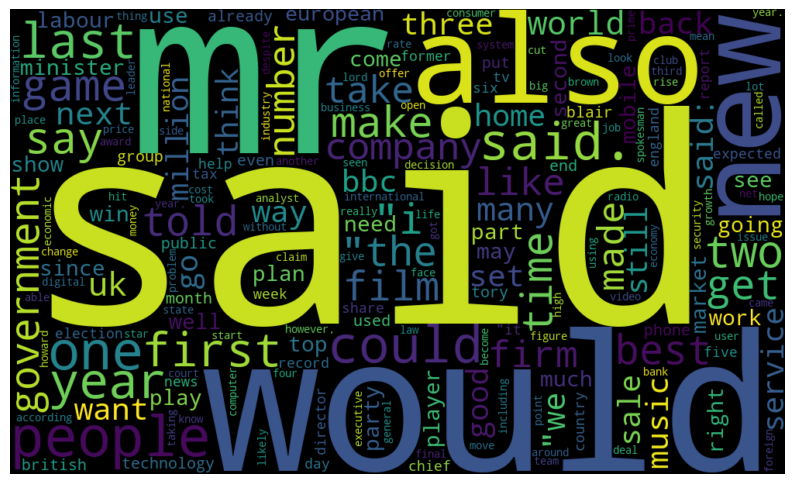

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
tokens = ' '.join(news.clean_text).split() #new version 

In [33]:
ngrams_2 = nltk.bigrams(tokens)
freq_2grams = pd.Series(ngrams_2).value_counts().to_dict()
list(freq_2grams.items())[:30]

[(('told', 'bbc'), 324),
 (('said', 'mr'), 313),
 (('mr', 'blair'), 256),
 (('prime', 'minister'), 249),
 (('mr', 'brown'), 195),
 (('chief', 'executive'), 180),
 (('"i', 'think'), 170),
 (('said', 'would'), 169),
 (('tony', 'blair'), 146),
 (('last', 'year'), 145),
 (('mr', 'howard'), 142),
 (('bbc', 'news'), 137),
 (('mobile', 'phone'), 134),
 (('liberal', 'democrat'), 133),
 (('new', 'york'), 126),
 (('six', 'nation'), 126),
 (('number', 'one'), 121),
 (('last', 'year,'), 120),
 (('said:', '"i'), 119),
 (('last', 'year.'), 115),
 (('bbc', 'radio'), 109),
 (('first', 'time'), 108),
 (('michael', 'howard'), 101),
 (('also', 'said'), 99),
 (('human', 'right'), 98),
 (('interest', 'rate'), 95),
 (('lib', 'dems'), 90),
 (('last', 'week'), 86),
 (('home', 'secretary'), 82),
 (('gordon', 'brown'), 79)]

    This is really neat. I can assume there is a few prominant figures who may be named Mr. Blair, Mr. Brown, the Prime Minister, etc. 

In [34]:
ngrams_3 = nltk.trigrams(tokens)
freq_3grams = pd.Series(ngrams_3).value_counts().to_dict()
list(freq_3grams.items())[:30]

[(('told', 'bbc', 'news'), 107),
 (('told', 'bbc', 'radio'), 73),
 (('bbc', 'radio', "4's"), 58),
 (('radio', "4's", 'today'), 53),
 (('bbc', 'news', 'website.'), 51),
 (('leader', 'michael', 'howard'), 47),
 (('tory', 'leader', 'michael'), 41),
 (('bbc', 'news', 'website'), 40),
 (('mr', 'blair', 'said'), 35),
 (('million', 'dollar', 'baby'), 32),
 (('prime', 'minister', 'tony'), 31),
 (('leader', 'charles', 'kennedy'), 29),
 (('mr', 'blair', 'told'), 27),
 (('mr', 'howard', 'said'), 26),
 (('told', 'bbc', 'sport.'), 24),
 (('world', 'number', 'one'), 24),
 (('foreign', 'secretary', 'jack'), 22),
 (('told', 'bbc', 'news:'), 22),
 (('minister', 'tony', 'blair'), 22),
 (('deputy', 'prime', 'minister'), 22),
 (('consumer', 'electronics', 'show'), 21),
 (('secretary', 'charles', 'clarke'), 21),
 (('coach', 'andy', 'robinson'), 21),
 (('home', 'secretary', 'charles'), 21),
 (('chancellor', 'gordon', 'brown'), 20),
 (('bbc', 'radio', 'five'), 20),
 (('bbc', 'world', 'service'), 20),
 (('nex

    I am a bit surprised to not see anything wierd here. I do see a repeat of a two letter word 'bn' -which I may assume is british news- I wont take it out yet but I will keep an eye out.

In [35]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Chris Lowson\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
from nltk.tag import pos_tag

pos_tags = pos_tag(tokens)
pos_tags[:20]

[('uk', 'JJ'),
 ('economy', 'NN'),
 ('facing', 'VBG'),
 ("'major", 'JJ'),
 ("risks'", 'NN'),
 ('uk', 'JJ'),
 ('manufacturing', 'NN'),
 ('sector', 'NN'),
 ('continue', 'VBP'),
 ('face', 'VBP'),
 ('"serious', 'JJ'),
 ('challenges"', 'NNS'),
 ('next', 'IN'),
 ('two', 'CD'),
 ('years,', 'JJ'),
 ('british', 'JJ'),
 ('chamber', 'NN'),
 ('commerce', 'NN'),
 ('(bcc)', 'NNP'),
 ('said.', 'NN')]

    Very helpful identifying grammar. Though, 'uk' shows up as both adjective and prepositions

In [37]:
from collections import Counter

Counter([j for i,j in pos_tag(tokens)])

Counter({'NN': 230192,
         'JJ': 101675,
         'VBD': 32790,
         'RB': 21081,
         'VBG': 18307,
         'CD': 17873,
         'VBP': 13732,
         'VBN': 10720,
         'VB': 10616,
         'NNS': 10195,
         'NNP': 9350,
         'IN': 8297,
         'MD': 5275,
         'VBZ': 3917,
         'JJS': 2292,
         'JJR': 1579,
         'FW': 990,
         'RBR': 836,
         'DT': 761,
         'RP': 387,
         'CC': 357,
         'POS': 330,
         'WP': 200,
         '$': 174,
         'RBS': 172,
         'PRP': 141,
         'WP$': 122,
         'WRB': 73,
         'WDT': 63,
         ':': 34,
         'PRP$': 23,
         'EX': 21,
         "''": 9,
         'UH': 6,
         'NNPS': 5,
         'TO': 2,
         'PDT': 2})

    Most common in my data would be Nouns, 'big' adjetive, and verb past tense. Nouns by an extreme margin dominate.

    EDA

In [38]:
news

,news,type,stopwords,char_cnt,word_cnt,clean_text,clean_cnt
0,UK economy facing 'major risks'\n \n The UK ma...,business,112,1996,329,uk economy facing 'major risks' uk manufacturi...,203
1,Aids and climate top Davos agenda\n \n Climate...,business,161,2727,454,aid climate top davos agenda climate change fi...,276
2,Asian quake hits European shares\n \n Shares i...,business,171,3444,553,asian quake hit european share share europe's ...,360
3,India power shares jump on debut\n \n Shares i...,business,55,1038,175,india power share jump debut share india's lar...,113
4,Lacroix label bought by US firm\n \n Luxury go...,business,47,894,152,lacroix label bought firm luxury good group lv...,99
...,...,...,...,...,...,...,...
2220,Warning over Windows Word files\n \n Writing a...,tech,172,2945,464,warning window word file writing microsoft wor...,279
2221,Fast lifts rise into record books\n \n Two hig...,tech,131,2286,399,fast lift rise record book two high-speed lift...,242
2222,Nintendo adds media playing to DS\n \n Nintend...,tech,121,1649,297,nintendo add medium playing nintendo releasing...,163
2223,Fast moving phone viruses appear\n \n Security...,tech,132,1939,335,fast moving phone virus appear security firm w...,192


In [39]:
lem_ls = list(news.clean_text.apply(lambda x: list(x.split())))
print(lem_ls[:2])

[['uk', 'economy', 'facing', "'major", "risks'", 'uk', 'manufacturing', 'sector', 'continue', 'face', '"serious', 'challenges"', 'next', 'two', 'years,', 'british', 'chamber', 'commerce', '(bcc)', 'said.', "group's", 'quarterly', 'survey', 'company', 'found', 'export', 'picked', 'last', 'three', 'month', '2004', 'best', 'level', 'eight', 'years.', 'rise', 'came', 'despite', 'exchange', 'rate', 'cited', 'major', 'concern.', 'however,', 'bcc', 'found', 'whole', 'uk', 'economy', 'still', 'faced', '"major', 'risks"', 'warned', 'growth', 'set', 'slow.', 'recently', 'forecast', 'economic', 'growth', 'slow', '3%', '2004', 'little', '2.5%', '2005', '2006.', "manufacturers'", 'domestic', 'sale', 'growth', 'fell', 'back', 'slightly', 'quarter,', 'survey', '5,196', 'firm', 'found.', 'employment', 'manufacturing', 'also', 'fell', 'job', 'expectation', 'lowest', 'level', 'year.', '"despite', 'positive', 'news', 'export', 'sector,', 'worrying', 'sign', 'manufacturing,"', 'bcc', 'said.', '"these', 'r

In [40]:

import gensim
import gensim.corpora as corpora

In [41]:
id2word = corpora.Dictionary(lem_ls)

corpus = [id2word.doc2bow(post) for post in lem_ls]

In [42]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [43]:
print(lda_model.print_topics())

[(0, '0.009*"game" + 0.006*"first" + 0.005*"said" + 0.004*"one" + 0.004*"player" + 0.004*"also" + 0.004*"new" + 0.004*"last" + 0.004*"world" + 0.004*"two"'), (1, '0.012*"said" + 0.009*"people" + 0.005*"would" + 0.005*"mobile" + 0.005*"new" + 0.005*"also" + 0.005*"could" + 0.004*"mr" + 0.004*"phone" + 0.004*"one"'), (2, '0.012*"said" + 0.007*"company" + 0.006*"firm" + 0.005*"mr" + 0.004*"sale" + 0.004*"also" + 0.004*"new" + 0.004*"would" + 0.004*"oil" + 0.003*"market"'), (3, '0.004*"ireland" + 0.003*"penalty" + 0.003*"last" + 0.003*"try" + 0.003*"one" + 0.003*"two" + 0.002*"hip-hop" + 0.002*"first" + 0.002*"o\'gara" + 0.002*"o\'driscoll"'), (4, '0.021*"film" + 0.008*"said" + 0.007*"best" + 0.006*"mr" + 0.006*"award" + 0.005*"actor" + 0.005*"director" + 0.004*"also" + 0.004*"oscar" + 0.004*"star"'), (5, '0.003*"said" + 0.001*"woman" + 0.001*"foster\'s" + 0.001*"hit" + 0.001*"parent" + 0.001*"also" + 0.001*"mtv" + 0.001*"show" + 0.001*"west" + 0.001*"loss"'), (6, '0.016*"mr" + 0.011*"woul

    these are not percentages, they are 'relative importance' to the 'topic'

In [44]:
from gensim.models import CoherenceModel

# compute the coherence score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=lem_ls, 
                                     dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4411345125148866


In [45]:

scores = []
for i in range(2,15):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))

Calcuting for 2 topics
Calcuting for 3 topics
Calcuting for 4 topics
Calcuting for 5 topics
Calcuting for 6 topics
Calcuting for 7 topics
Calcuting for 8 topics
Calcuting for 9 topics
Calcuting for 10 topics
Calcuting for 11 topics
Calcuting for 12 topics
Calcuting for 13 topics
Calcuting for 14 topics


In [46]:
scores

[(2, 0.3289167413942502),
 (3, 0.3952361126157424),
 (4, 0.34496072630109587),
 (5, 0.3243030928438072),
 (6, 0.39885250114128273),
 (7, 0.38740203746384566),
 (8, 0.39292521749942677),
 (9, 0.45557357652132463),
 (10, 0.40922432276198395),
 (11, 0.45863639148731145),
 (12, 0.4542077968722917),
 (13, 0.4411180737650613),
 (14, 0.41683972560819776)]

        The scores seem to adjust pretty randomly, worth checking a few more.

In [47]:
scores = []
for i in range(15,25):
    print(f'Calcuting for {i} topics')
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=lem_ls, 
                                         dictionary=id2word, 
                                         coherence='c_v')

    coherence_lda = coherence_model_lda.get_coherence()
    
    scores.append((i,coherence_lda))

Calcuting for 15 topics
Calcuting for 16 topics
Calcuting for 17 topics
Calcuting for 18 topics
Calcuting for 19 topics
Calcuting for 20 topics
Calcuting for 21 topics
Calcuting for 22 topics
Calcuting for 23 topics
Calcuting for 24 topics


In [48]:
scores

[(15, 0.43402534520125785),
 (16, 0.3839198881370257),
 (17, 0.4259106816084833),
 (18, 0.4401929299193775),
 (19, 0.43418577382771484),
 (20, 0.39737252416207086),
 (21, 0.40451941552874454),
 (22, 0.40206083668213527),
 (23, 0.46983492734964366),
 (24, 0.42952417494286793)]

    It seems I peak at 15 topics with a .43 (even though we seems higher I want to use lessen the work im asking of the cells)

In [49]:
bf_lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=15, 
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [51]:
pip install pyLDAvis

  Obtaining dependency information for pyLDAvis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/65/76/903324159e4a3566e518c558aeb21571d642f781d842d8dd0fd9c6b0645a/scipy-1.10.1-cp311-cp311-win_amd64.whl.met

In [52]:
import pyLDAvis
import pyLDAvis.gensim_models


In [53]:

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(bf_lda_model, corpus, id2word)

In [54]:
pyLDAvis.save_html(LDAvis_prepared,'15_topic.html')

I am happy with the way that this plotting looks, I have good dispersal among the topics. 

After importing the news data, I added some informational columns to tell me more about my data. I then identified waht is known as 'stop words', a useful tool to start to differentiate the material. I then tried to have words reduced to their root, more or less, to not cloud the data with similar words like run and ran. I as well cleaned the material to eliminate digits, symbols, and websites/emails or anything else not really a 'word'. After doing all this I cut off nearly -40% of words per news ID from all the cleaning. After some testing I found that 15 topics was my best route for some further vizualisation and analysis. 